## Team Lunita:

* Cano Jeorval
* Cuevas Danilo
* Erosa Jorge
* Hernandez Andrés
* Robles Jack

# NB6. Epidemics

## 1. Epidemic Modeling

Epidemic Modeling allows to use analytical and numerical frameworks to model the spread of pathogens. This framework relies on two fundamental hypotesis:
* Compartmentalization. Epidemic classify each individual based on the stage of the disease affecting them. The simplest classifications consider the following compartments or states:
    * Susceptible (S): Healthy individuals who can potentially get infected by the disease.
    * Infectious (I): Infected individuals who has can infect others.
    * Recovered (R): Individuals who have either recovered from the disease and have complete or partial inmunity.
* Homogenuous Mixing. This hypotesis consider that each individual has the same chance of coming into contact with an infected individual.     

In this section we will review the most frequently used epidemic models: SI, SIS and SIR Models. 

### 1.1 SI Model
Consider a disease spreading in a population of N individuals. The number of susceptible individuals is denoted with $S(t)$ and infected individuals as $I(t)$. Consider that a certain time $t$ there is $I(t)$ infected individuals. A typical individual has $\langle k \rangle$ contacts and that the likelihood that the disease will be transmitted from an infected to a susceptible individual in a unit time is $\beta$. 

The new infections $dI(t)$ during a timeframe $dt$ can be described as:
$$
dI(t) = \beta \langle k \rangle \frac{S(t)I(t)}{N} dt
$$

Consequently $I(t)$ changes at the rate:
$$
\frac{dI(t)}{dt} = \beta \langle k \rangle \frac{S(t)I(t)}{N}
$$

Instead of using the absolute number of susceptible and infected individuals, it is possible to use the fraction of the susceptible and of the infected population at time $t$:
$$
s(t) = \frac{S(t)}{N}
$$

$$
i(t) = \frac{I(t)}{N}
$$
Additionally, we can observe that the number of individuals of the population remains constant, i.e.
$$
S(t) + I(t) = N
$$
or
$$
s(t) + i(t) = 1
$$
Finally, it is possible to get:
$$
\frac{di}{dt} = \beta \langle k \rangle i(1-i)
$$
where the product $\beta \langle k \rangle$ is called the transmission rate or transmissibility. On the other hand, the rate of $s(t)$ is given by:
$$
\frac{ds}{dt} = - \beta \langle k \rangle i(1-i)
$$


In this model, the characteristic time, i.e. the time required to reach $1/e$ fraction (36 %) of all susceptible individuals, is:
$$
\tau = \frac{1}{\beta \langle k \rangle}
$$

### 1.2 SIS Model
In general, most pathogens are eventually defeated by the inmune system or treatment. In this context, it is possible to capture the recovering of infected individuals. Considering that the infected individuals recover at a fixed rate $\mu$, the dynamic of this model is given by,
$$
\frac{di}{dt} = \beta \langle k \rangle i(1-i) - \mu i
$$

On the other hand, the rate of $s(t)$ is given by:
$$
\frac{ds}{dt} = - \beta \langle k \rangle i(1-i) + \mu i
$$
The therm $\mu$ is known as recovery rate. Additionally, the characteristic time of this model is:
$$
\tau = \frac{1}{\mu(R_0 - 1)}
$$
where $R_0$ given by,
$$
R_0 = \frac{\beta \langle k \rangle}{\mu}
$$
The term $R_0$ is called the basic reproductive number. It represents the average number of susceptible individuals infected by an infected individuals during its infectious. The basic reproductive number is valuable because it can predict the behavior of this model:
* If $R_0$ exceeds unity, $\tau$ is positive and the epidemic is in an endemic state. In this case $\mu < \beta \langle k \rangle$. In this state, the number of newly infected individuals equals the number of individuals who recover from the disease, hence the infected fraction of the population does not change over time. In the limit where $t\to \infty$:
$$
i(\infty) = 1 - \frac{\mu}{\beta \langle k \rangle}
$$
* If $R_0$ is less than the unity, $\tau$ is negative and the epidemic is in a disease-free state. In this case, the number of individuals recovered per unit time exceeds the number of newly infected individuals. The fraction of infected $i$ decreases exponentially with time, indicating that an initial infection will die out exponentially.

### 1.3 SIR Model

For many pathogens, individuals develop inmunity after they recover from the infection. Hence, insted of returning to the susceptible state, they are "removed" from the population. The differential equations governing the time evolution of the SIR Model are:
$$
\frac{di}{dt} = \beta \langle k \rangle i(1-r-i) - \mu i
$$

$$
\frac{ds}{dt} = -\beta \langle k \rangle i(1-r-i)
$$

$$
\frac{dr}{dt} = \mu i
$$
In the case of the SIR model, everyone recovers at the end of the disease spreading.

### 1.4 SIR Model - Numerical Solution

Considering that the transmission rate will be described as:
$$
\eta = \beta \langle k \rangle
$$

The differential equations of the SIR Model can be written as:
$$
\frac{di}{dt} = \eta i(1-r-i) - \mu i
$$

$$
\frac{ds}{dt} = -\eta i(1-r-i)
$$

$$
\frac{dr}{dt} = \mu i
$$

The following Python code integrates these equations.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx
import gif

In [2]:
def fun(y, t, eta, mu):
    s, i, r = y
    dsdt = -eta * s * i
    didt = eta * s * i  - mu * i
    drdt = mu * i
    return dsdt, didt, drdt

Consider the spread of a disease in a population of $N = 100$ individuals, where at the beginning only one is infected, i.e.
$$
S_0 = 99
$$

$$
I_0 = 1
$$

$$
R_0 = 0
$$
Additionally, consider that the transmission rate is $\eta = 1.0$ and the recovery rate is $\mu = 0.1$. Consider a time frame in the interval $(0, 50)$.

In [3]:
# N: Total population.
N = 100

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 99
s0 = S0 / N

# R0: Number of recovered individuals at t = 0.
R0 = 0
r0 = R0 / N

# Transmission Rate and Recovery Rate
eta = 1.0
mu = 0.1

y0 = s0, i0, r0

# Time points
t = np.linspace(0, 50, 100)

In [4]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
ret = odeint(fun, y0, t, args=(eta, mu))

s, i, r = ret.T

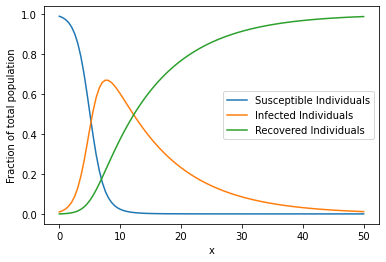

In [5]:
# Plot Result
fig = plt.figure()
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.plot(t, r, label = "Recovered Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.show()

## 1.5 Fitting the SIR Model 

The information in Table 1 was retrieved from an issue of the British Medical Journal (1978). In this issue there is an epidemiological case study about influenza in a British boarding school.

| Day        | 1 | 2 | 3 | 4  | 5  | 6   | 7   | 8   | 9   | 10  | 11  | 12 | 13 | 14 | 15 |
|------------|---|---|---|----|----|-----|-----|-----|-----|-----|-----|----|----|----|----|
| Infections | 1 | 3 | 6 | 25 | 73 | 222 | 294 | 258 | 237 | 191 | 125 | 69 | 27 | 11 | 4  |

The ```scipy.optimize.curve_fit``` method can be used to fit a function to data. ```curve_fit``` requires three inputs:
```python
scipy.integrate.curve_fit(func, xdata, ydata)
                       
```

* func: The model function, f(x, …). It must take the independent variable as the first argument and the parameters to fit as separate remaining arguments.
* xdata: The independent variable where the data is measured.
* ydata: The dependent data.

In [6]:
from scipy.optimize import curve_fit

In [7]:
# Data
idata = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4]
idata = np.array(idata)
tdata = np.linspace(1,15, 15)

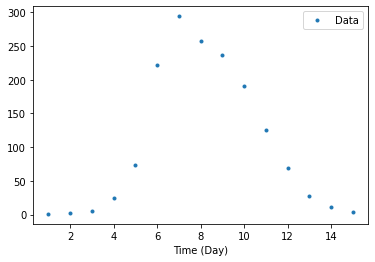

In [8]:
# Data Visualization
fig = plt.figure()
plt.plot(tdata, idata, '.', label = "Data")
plt.legend()
plt.xlabel('Infected')
plt.xlabel('Time (Day)')
plt.show()

In [9]:
# Variable Initialization

# N: Total population.
N = 763
fdata = idata / N

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 762
s0 = S0 / N

# R0: Number of recovered individuals at t = 0.
R0 = 0
r0 = R0 / N

y0 = s0, i0, r0

In [10]:
def fit_odeint(t, eta, mu):
    return odeint(fun, y0, t, args=(eta, mu))[:,1]

In [11]:
fit_odeint(tdata, eta, mu)

array([0.00131062, 0.0032165 , 0.00786687, 0.01908148, 0.0453761 ,
       0.10314691, 0.21357278, 0.37660973, 0.53993587, 0.64083117,
       0.66985978, 0.65276459, 0.61389573, 0.56718652, 0.51930662])

In [12]:
popt, pcov = curve_fit(fit_odeint, tdata, fdata)
eta, mu = popt
print("Eta: ", round(eta,4))
print("Mu: ", round(mu, 4))

Eta:  1.6638
Mu:  0.4452


In [13]:
reproductiveNumber = eta/mu
print("Reproductive Number: ", round(reproductiveNumber,4))

Reproductive Number:  3.7371


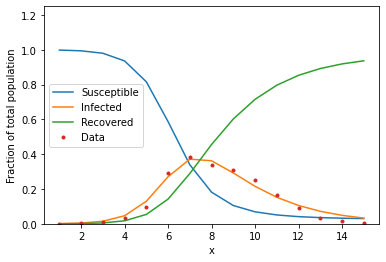

In [14]:
ret = odeint(fun, y0, tdata, args=(eta, mu))
s, i, r = ret.T

# Plot Result
fig = plt.figure()
plt.plot(tdata, s, label = "Susceptible")
plt.plot(tdata, i, label = "Infected")
plt.plot(tdata, r, label = "Recovered")
plt.plot(tdata, fdata, '.', label = "Data")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.ylim([0, 1.25])
plt.show()

## Exercises

(a) Compute the numerical integration for the SI Model. Make a plot of the fraction of Susceptibles and Infected considering $N = 100$ , $I_0 = 1$ and $\beta \langle k \rangle = 0.3$ in a time frame from 0 to 50.  

In [15]:
def fun(y, t, b_k, n = 0):
    s, i = y
    
    didt = b_k * i * s
    dsdt = -b_k * i * s
    return dsdt, didt

In [16]:
# N: Total population.
N = 100

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 99
s0 = S0 / N

# Transmission Rate and Recovery Rate
b_k = 0.3

y0 = s0, i0

# Time points
t = np.linspace(0, 50, 100)

In [17]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
ret = odeint(fun, y0, t, args=(b_k, 0))

s, i = ret.T

#### Numerical Integration
To get the infected we need to multiply the array i by N and apply round

In [18]:
np.round(i * N)

array([  1.,   1.,   1.,   2.,   2.,   2.,   2.,   3.,   3.,   4.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  12.,  13.,  15.,  17.,  20.,
        22.,  25.,  28.,  31.,  34.,  38.,  41.,  45.,  49.,  53.,  56.,
        60.,  64.,  67.,  70.,  73.,  76.,  79.,  81.,  83.,  85.,  87.,
        89.,  90.,  91.,  93.,  94.,  94.,  95.,  96.,  96.,  97.,  97.,
        98.,  98.,  98.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,  99.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

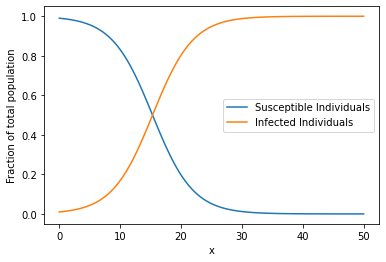

In [19]:
# Plot Result
fig = plt.figure()
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.show()

## Comparing numerical solution against analytical solution

In [20]:
def yAnalytical(I_0, b_k, t):
    
    numerator = I_0 * np.exp(b_k * t)
    
    denominator = 1 - I_0 + I_0 * np.exp(b_k * t)
    
    return numerator / denominator

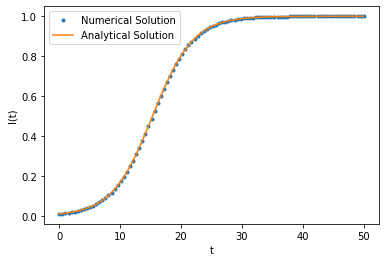

In [21]:
plt.plot(t, i, '.', label = 'Numerical Solution')
plt.plot(t, yAnalytical(i0, b_k, t), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('I(t)')
plt.show()

(b) Compute the numerical integration for the SIS Model. Make a plot of the fraction of Susceptibles and Infected considering $N = 100$, $I_0 = 1$, $\beta \langle k \rangle = 1$ and $\mu = 0.1$ in a time frame from 0 to 50.  

In [22]:
def fun(y, t, b_k, mu):
    s, i = y
    
    didt = b_k * i * s - mu * i
    dsdt = -b_k * i * s + mu * i
    return dsdt, didt

In [23]:
# N: Total population.
N = 100

# I0: Number of infected individuals at t = 0.
I0 = 1
i0 = I0 / N

# S0: Number of susceptible individuals at t = 0.
S0 = 99
s0 = S0 / N

# Transmission Rate and Recovery Rate
b_k = 1

mu = 0.1

y0 = s0, i0

# Time points
t = np.linspace(0, 50, 100)

In [24]:
# Initial conditions vector
# Integrate the SIR equations over the time grid, t.
ret = odeint(fun, y0, t, args=(b_k, mu))


s, i = ret.T

#### Numerical Integration
To get the infected we need to multiply the array i by N and apply round

In [25]:
np.round(i * N)

array([ 1.,  2.,  2.,  4.,  6.,  9., 13., 19., 27., 36., 46., 56., 65.,
       72., 78., 82., 85., 87., 88., 89., 89., 89., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90., 90.,
       90., 90., 90., 90., 90., 90., 90., 90., 90.])

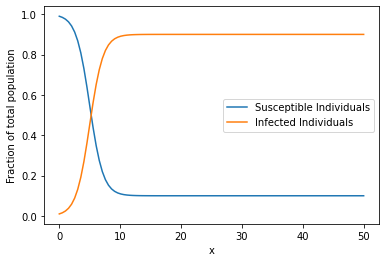

In [26]:
# Plot Result
fig = plt.figure()
plt.plot(t, s, label = "Susceptible Individuals")
plt.plot(t, i, label = "Infected Individuals")
plt.legend()
plt.ylabel('Fraction of total population')
plt.xlabel('x')
plt.show()

(c) Simulate the SIR dynamics on a random network with $N = 1000$ nodes and link probability $p = 0.01$. Initially 10 nodes are infected, chosen at random. The probability of recovery is $\mu = 0.5$. Run the dynamics for these values of the infection probability $\beta =$ 0.02, 0.05, 0.1, 0.2. In each run, save the number of simultaneously infected people after each iteration and calculate the maximum value. Additionally, present a plot with the node state proportions. Interpret the results. How many iterations are needed to reach the maximum? Do you observe a major outbreak? Why or why not? (Hint: Feel free to modify the code in this chapter’s tutorial to run the simulations.) In order to complete this task, consider the Chapter 7 Tutorial ([Link](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%207%20Tutorial.ipynb)) from the Mencszer et al. (2020) book.

In [27]:
def initial_state(G, n_nodes = 10):
    """
    Function to initialize a percentage of nodes into actives and the remaining into inactives
    
    input:
    G: A graph
    p_nodes: number of nodes iniatially infected
    
    output:
    return a dictinoary with the names of the nodes and whether is susceptible or infected
    """
    state = {}
    for node in G.nodes:
        state[node] = 'Susceptible'
     
    #get the random nodes to be activated
    active_nodes = np.random.choice(list(G.nodes), size = 10, replace = False)
    
    for node in active_nodes:
        state[node] = 'Infected'
    
    return state

def get_nodes_states(nodes_states):
    """
    Function to obtain the number of susceptible nodes, infected nodes and recovered nodes
    
    input:
    nodes_states: dictionaty containing the state of each node
    
    output:
    return the number of susceptible nodes, infected nodes and recovered nodes
    """
    
    S = 0
    
    I = 0
    
    R = 0
    
    for val in nodes_states.values():
        
        if val == 'Susceptible':
            S += 1
            
        elif val == 'Infected':
            I += 1
            
        else:
            R += 1
            
    return S, I, R

@gif.frame
def plot_G(G, pos, nodes_states, t):
    """
    Function to get a frame for the gif
    
    input:
    G: Graph
    pos: it is layer for plotting the graph
    nodes_states: dictionary containing state of each node

    return a frame
    """
    
    node_colors = []
    
    #getting the color of the nodes
    for node in G.nodes:
        
        if nodes_states[node] == 'Susceptible':
            node_colors.append('blue')
            
        elif nodes_states[node] == 'Infected':
            node_colors.append('yellow')
            
        else:
            node_colors.append('red')
    
    s = 30
    
    fig, ax = plt.subplots(figsize = (12, 12), dpi = 65)
    nx.draw_networkx_nodes(G, pos = pos, nodelist = G.nodes(), node_color = node_colors, node_size = s, ax = ax, edgecolors = 'black')    
    nx.draw_networkx_edges(G, pos = pos, edgelist = G.edges(), ax = ax, alpha = 0.1)
    
    ax.set_title("Iteration %s" % t)
    
def SIR_model(G, pos, mu = 0.5, beta = .02, n_nodes = 10, iterations = 100, gif = True):
    
    """
    Function that simulates the treshold model for information spreading
    
    input:
    G: Graph
    pos: it is layer for plotting the graph
    mu: float, treshold for a node to get recovered
    beta: float, treshold for a node to get infected
    n_nodes: int, number of nodes that get randomly infected at the beginning
    iterations: max number of iterations
    gif: boolean to return or not the frame
    
    
    output:
    return the vulnerable_nodes and the frames
    """
    
    
    #initializing nodes
    nodes_state = initial_state(G, n_nodes = n_nodes)
    
    frames = []
    
    i = 0
    
    #frame of the first activated nodes
    if gif:
        frames.append(plot_G(G, pos, nodes_state, 0))
        
    S_list = [G.number_of_nodes() - n_nodes]
    I_list = [n_nodes]
    R_list = [0]
        
    print("i: {} \t\t S: {} \t\t I:{} \t\t R:{}".format(i, G.number_of_nodes() - n_nodes, n_nodes, 0))    
    
    for i in range(1, iterations + 1):
        
        new_states = dict()
        
        for node in G.nodes:
            
            if nodes_state[node] == 'Recovered':
                continue
            
            
            elif nodes_state[node] == 'Infected':
                if np.random.rand() < mu:
                    new_states[node] = 'Recovered'
                
            else:
                for neigh in G.neighbors(node):
                    
                    if nodes_state[neigh] == 'Infected':
                        
                        if np.random.rand() < beta:
                            
                            new_states[node] = 'Infected'
                            
                            break
        
        #updating the new active nodes
        nodes_state.update(new_states)
        
        S, I, R = get_nodes_states(nodes_state)
        
        S_list.append(S)
        I_list.append(I)
        R_list.append(R)
        
        print("i: {} \t\t S: {} \t\t I:{} \t\t R:{}".format(i, S, I, R))
        if gif:
            frames.append(plot_G(G, pos, nodes_state, i))
        
        #case where there is no more people to be infected or there is no more infected, therefore, the infection cannot spread
        if S == 0 or I == 0:
            break
            
    if gif:
        return S_list, I_list, R_list, frames
    
    return S_list, I_list, R_list    

In [28]:

i = 0
while True:
    model = nx.generators.random_graphs.erdos_renyi_graph(n = 1000, p = .01, seed = i)
    
    if nx.algorithms.components.is_connected(model):
        print(i)
        break
    i += 1

0


In [29]:
G_copy = model.copy()

In [30]:
pos = nx.spring_layout(G_copy)

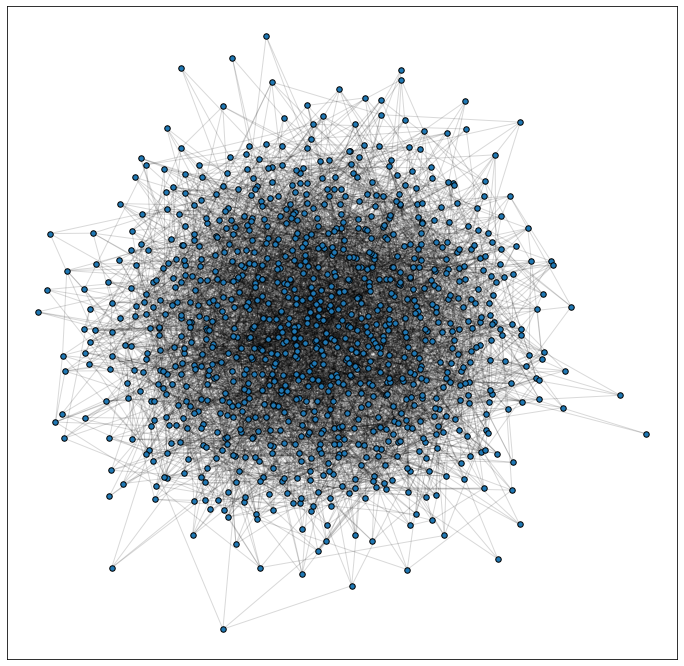

In [31]:
# Network Visualization
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G_copy, pos, node_size=30, edgecolors = 'black')
nx.draw_networkx_edges(G_copy, pos, alpha=0.15)
plt.show()

## Beta = 0.002

In [32]:
S, I, R, frames = SIR_model(G_copy, pos, mu = 0.5, beta = .02, n_nodes = 10, gif = True)

i: 0 		 S: 990 		 I:10 		 R:0
i: 1 		 S: 988 		 I:6 		 R:6
i: 2 		 S: 987 		 I:5 		 R:8
i: 3 		 S: 987 		 I:3 		 R:10
i: 4 		 S: 987 		 I:0 		 R:13


In [33]:
print("the maximum number of simultaneous infecteds are: {} and is in the iteraion: {}".format(max(I), np.argsort(I)[-1]))

the maximum number of simultaneous infecteds are: 10 and is in the iteraion: 0


In [34]:
gif.save(frames, "images/infection_beta_02.gif", duration = len(frames), unit = "s", between='startend')

![](images/infection_beta_02.gif)

#### Interpretation:
As we can clearly see there's no major outbreak and we reached the maximum number of infected since the starting position, which means it didn't even develop into an epidemic. The most infections at a given time was a total 1% of the population. This is mainly due to the fact that the probability fo infection is really low, at barely 0.2%.

In [35]:
x = range(0, len(S))

N = G_copy.number_of_nodes()

S = np.array(S)/N
I = np.array(I)/N
R = np.array(R)/N

In [36]:
S

array([0.99 , 0.988, 0.987, 0.987, 0.987])

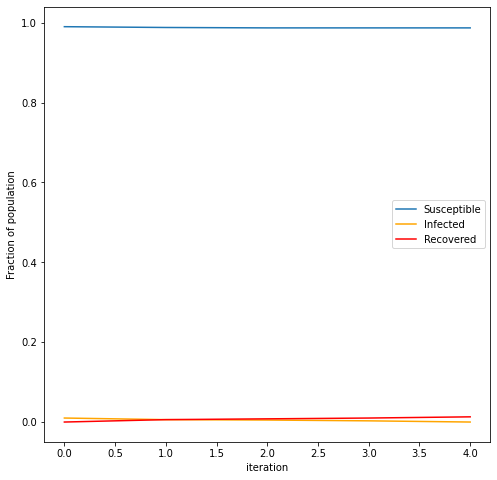

In [37]:
fig = plt.figure(figsize = (8,8))

plt.plot(x, S, label = 'Susceptible')
plt.plot(x, I, label = 'Infected', color = 'orange')
plt.plot(x, R, label = 'Recovered', color = 'red')
plt.xlabel('iteration')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

## Beta = 0.05

In [38]:
S, I, R, frames = SIR_model(G_copy, pos, mu = 0.5, beta = .05, n_nodes = 10, gif = True)

i: 0 		 S: 990 		 I:10 		 R:0
i: 1 		 S: 985 		 I:8 		 R:7
i: 2 		 S: 980 		 I:9 		 R:11
i: 3 		 S: 975 		 I:11 		 R:14
i: 4 		 S: 969 		 I:11 		 R:20
i: 5 		 S: 966 		 I:9 		 R:25
i: 6 		 S: 964 		 I:5 		 R:31
i: 7 		 S: 964 		 I:3 		 R:33
i: 8 		 S: 963 		 I:3 		 R:34
i: 9 		 S: 963 		 I:1 		 R:36
i: 10 		 S: 963 		 I:0 		 R:37


In [39]:
print("the maximum number of simultaneous infecteds are: {} and is in the iteraion: {}".format(max(I), np.argsort(I)[-1]))

the maximum number of simultaneous infecteds are: 11 and is in the iteraion: 4


In [40]:
gif.save(frames, "images/infection_beta_05.gif", duration = len(frames), unit = "s", between='startend')

![](images/infection_beta_05.gif)

#### Interpretation:
As we can clearly see there's also no major outbreak. However, we reached the maximum number of infected after a few iterations which means it this time there was clearly some spread happening. The most infections at a given time was just above 1% of the population. This is mainly due to the fact that the probability fo infection is still really low, at 5%.

In [41]:
x = range(0, len(S))

N = G_copy.number_of_nodes()

S = np.array(S)/N
I = np.array(I)/N
R = np.array(R)/N

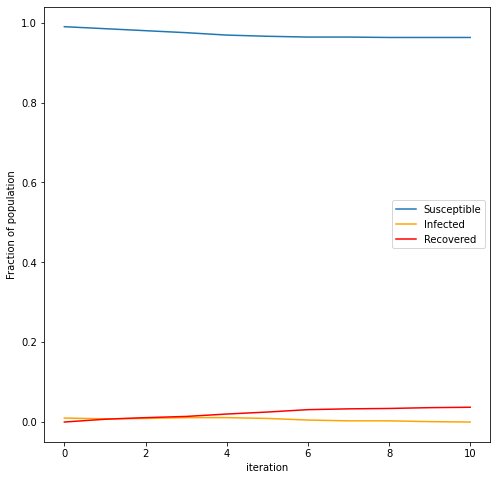

In [42]:
fig = plt.figure(figsize = (8,8))

plt.plot(x, S, label = 'Susceptible')
plt.plot(x, I, label = 'Infected', color = 'orange')
plt.plot(x, R, label = 'Recovered', color = 'red')
plt.xlabel('iteration')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

## Beta = .1

In [43]:
S, I, R, frames = SIR_model(G_copy, pos, mu = 0.5, beta = .1, n_nodes = 10, gif = True)

i: 0 		 S: 990 		 I:10 		 R:0
i: 1 		 S: 982 		 I:12 		 R:6
i: 2 		 S: 973 		 I:14 		 R:13
i: 3 		 S: 959 		 I:25 		 R:16
i: 4 		 S: 929 		 I:40 		 R:31
i: 5 		 S: 890 		 I:59 		 R:51
i: 6 		 S: 831 		 I:93 		 R:76
i: 7 		 S: 761 		 I:117 		 R:122
i: 8 		 S: 689 		 I:130 		 R:181
i: 9 		 S: 603 		 I:153 		 R:244
i: 10 		 S: 532 		 I:156 		 R:312
i: 11 		 S: 475 		 I:130 		 R:395
i: 12 		 S: 420 		 I:118 		 R:462
i: 13 		 S: 381 		 I:96 		 R:523
i: 14 		 S: 349 		 I:79 		 R:572
i: 15 		 S: 326 		 I:56 		 R:618
i: 16 		 S: 319 		 I:30 		 R:651
i: 17 		 S: 311 		 I:21 		 R:668
i: 18 		 S: 307 		 I:13 		 R:680
i: 19 		 S: 304 		 I:12 		 R:684
i: 20 		 S: 301 		 I:9 		 R:690
i: 21 		 S: 300 		 I:6 		 R:694
i: 22 		 S: 299 		 I:4 		 R:697
i: 23 		 S: 298 		 I:4 		 R:698
i: 24 		 S: 297 		 I:2 		 R:701
i: 25 		 S: 297 		 I:2 		 R:701
i: 26 		 S: 297 		 I:1 		 R:702
i: 27 		 S: 297 		 I:0 		 R:703


In [44]:
print("the maximum number of simultaneous infecteds are: {} and is in the iteraion: {}".format(max(I), np.argsort(I)[-1]))

the maximum number of simultaneous infecteds are: 156 and is in the iteraion: 10


In [45]:
gif.save(frames, "images/infection_beta_1.gif", duration = len(frames), unit = "s", between='startend')

![](images/infection_beta_1.gif)

#### Interpretation:
This time, it's tougher than it looks. To our understanding there's no "major", yet there's still an outbreak. We reached the maximum number of infected after a few iterations which means it this time there was clearly some spread happening. The most infections at a given time was just above 15% of the population. We can see how the jump from a 5% to a 10% probability of infection greately impacts the results. Still 15% of the population of 1000 doesn't seem all that alarming, although it is an outbreak.

In [46]:
x = range(0, len(S))

N = G_copy.number_of_nodes()

S = np.array(S)/N
I = np.array(I)/N
R = np.array(R)/N

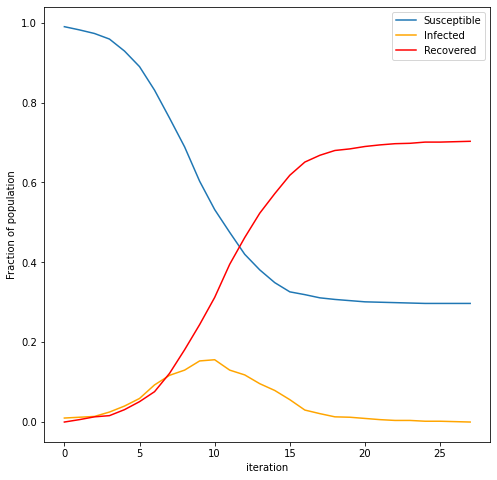

In [47]:
fig = plt.figure(figsize = (8,8))

plt.plot(x, S, label = 'Susceptible')
plt.plot(x, I, label = 'Infected', color = 'orange')
plt.plot(x, R, label = 'Recovered', color = 'red')
plt.xlabel('iteration')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

## Beta = 0.2

In [48]:
S, I, R, frames = SIR_model(G_copy, pos, mu = 0.5, beta = .2, n_nodes = 10, gif = True)

i: 0 		 S: 990 		 I:10 		 R:0
i: 1 		 S: 967 		 I:31 		 R:2
i: 2 		 S: 918 		 I:66 		 R:16
i: 3 		 S: 823 		 I:129 		 R:48
i: 4 		 S: 646 		 I:236 		 R:118
i: 5 		 S: 409 		 I:363 		 R:228
i: 6 		 S: 203 		 I:403 		 R:394
i: 7 		 S: 108 		 I:302 		 R:590
i: 8 		 S: 66 		 I:194 		 R:740
i: 9 		 S: 51 		 I:106 		 R:843
i: 10 		 S: 45 		 I:64 		 R:891
i: 11 		 S: 41 		 I:33 		 R:926
i: 12 		 S: 39 		 I:20 		 R:941
i: 13 		 S: 39 		 I:13 		 R:948
i: 14 		 S: 39 		 I:11 		 R:950
i: 15 		 S: 39 		 I:3 		 R:958
i: 16 		 S: 39 		 I:1 		 R:960
i: 17 		 S: 39 		 I:0 		 R:961


In [49]:
print("the maximum number of simultaneous infecteds are: {} and is in the iteraion: {}".format(max(I), np.argsort(I)[-1]))

the maximum number of simultaneous infecteds are: 403 and is in the iteraion: 6


In [50]:
gif.save(frames, "images/infection_beta_2.gif", duration = len(frames), unit = "s", between='startend')

![](images/infection_beta_2.gif)

#### Interpretation
20% probability of infection. We have a winner. To us, this clearly represents a major outbreak. After 6 iterations, having over 40% of the population already infected sure enough can be classified as a major outbreak. We can see how doubling the probability of infection from 5% to 10% already had a clear effect, but doubling it again to 20% completely crushes the population.

In fact we can see how a paper from Agrawal and Bhardwaj titled "Probability of COVID-19 infection by cough of a normal person and a super-spreader" clearly showcases the probability of infection between no mask, surgical mask and N95 mask after coughing given a distance from 0 up to 2.5 meters. It's impressive to see how just by merely standing 1.5 meters away from another person, you can reduce the effects of the cough and nearly nullify them. Yet it's impressive to see how some people during this pandemic still couldn't care less about social distancing.

In [51]:
x = range(0, len(S))

N = G_copy.number_of_nodes()

S = np.array(S)/N
I = np.array(I)/N
R = np.array(R)/N

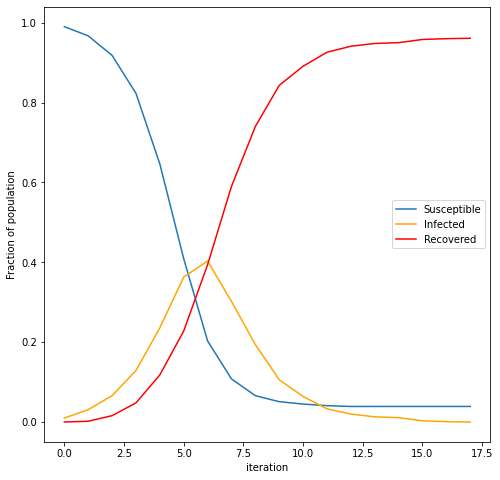

In [52]:
fig = plt.figure(figsize = (8,8))

plt.plot(x, S, label = 'Susceptible')
plt.plot(x, I, label = 'Infected', color = 'orange')
plt.plot(x, R, label = 'Recovered', color = 'red')
plt.xlabel('iteration')
plt.ylabel('Fraction of population')
plt.legend()
plt.show()

## References

[1] The SIR epidemic model: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/.

[2] Fitting the SIR model of disease to data in Python: https://numbersandshapes.net/post/fitting_sir_to_data_in_python/.

[3] F. Mencszer, S. Fortunato, C. A. Davis (2020). A First Course in Network Science.

[4] L. A. Barabasi (2016) Network Science. 

[5] Agrawal, A., & Bhardwaj, R. (2021). Probability of COVID-19 infection by cough of a normal person and a super-spreader. Physics of Fluids, 33(3), 031704.: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7976050/